In [1]:
#import Neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

#import required accuracy metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Micro-Credit Defaulter Model

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

In [2]:
#loading the data set
df = pd.read_csv(r"C:\Users\Asus\Desktop\flipnwork\abhi micro\Data file.csv")
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


## Features

* label	: Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
* msisdn :	mobile number of user
* aon :	age on cellular network in days
* daily_decr30 :	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
* daily_decr90 :	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
* rental30 :	Average main account balance over last 30 days
* rental90 :	Average main account balance over last 90 days
* last_rech_date_ma :	Number of days till last recharge of main account
* last_rech_date_da: 	Number of days till last recharge of data account
* last_rech_amt_ma :	Amount of last recharge of main account (in Indonesian Rupiah)
* cnt_ma_rech30 :	Number of times main account got recharged in last 30 days
* fr_ma_rech30 :	Frequency of main account recharged in last 30 days
* sumamnt_ma_rech30 :	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
* medianamnt_ma_rech30 :	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
* medianmarechprebal30 :	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
* cnt_ma_rech90 :	Number of times main account got recharged in last 90 days
* fr_ma_rech90 :	Frequency of main account recharged in last 90 days
* sumamnt_ma_rech90 :	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
* medianamnt_ma_rech90 :	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
* medianmarechprebal90 :	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
* cnt_da_rech30 :	Number of times data account got recharged in last 30 days
* fr_da_rech30: 	Frequency of data account recharged in last 30 days
* cnt_da_rech90 : 	Number of times data account got recharged in last 90 days
* fr_da_rech90 : 	Frequency of data account recharged in last 90 days
* cnt_loans30 : 	Number of loans taken by user in last 30 days
* amnt_loans30: 	Total amount of loans taken by user in last 30 days
* maxamnt_loans30 : 	maximum amount of loan taken by the user in last 30 days
* medianamnt_loans30 : 	Median of amounts of loan taken by the user in last 30 days
* cnt_loans90 : 	Number of loans taken by user in last 90 days
* amnt_loans90 : 	Total amount of loans taken by user in last 90 days
* maxamnt_loans90 : 	maximum amount of loan taken by the user in last 90 days
* medianamnt_loans90 : 	Median of amounts of loan taken by the user in last 90 days
* payback30 :	Average payback time in days over last 30 days
* payback90 :	Average payback time in days over last 90 days
* pcircle : 	telecom circle
* pdate :	date


In [3]:
#Check the shape of data
df.shape

(209593, 37)

we can see This dataset is having 209593 rows and 37 columns.

In [4]:
#check the columns
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
#lets check for null values
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

Luckily we are not having any null values.

In [6]:
#lets see info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [7]:
#lets check for duplicate values
df.duplicated().sum()

0

Great we are not having any duplicate values.

Looking at the data info, data set has 3 columns with object data type and others are integer and float types

As column 'Unnamed: 0' contains only index and column 'msisdn' has phone numbers these columns are not contributing to our prediction hence I am dropping these columns

In [8]:
df.drop(columns = ['Unnamed: 0', 'msisdn'] , inplace = True )

In [9]:
#lets convert age into years for better understanding
df['aon'] = df['aon']/365

In [10]:
#lets describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000000,1.000000,1.000000,1.000000
aon,209593.0,22.225598,207.386527,-0.131507,0.673973,1.443836,2.690411,2739.344535
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440000,1469.175667,7244.000000,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692000,1500.000000,7802.790000,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420000,1083.570000,3356.940000,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260000,1334.000000,4201.790000,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000000,3.000000,7.000000,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000000,0.000000,0.000000,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000000,1539.000000,2309.000000,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000000,3.000000,5.000000,203.000000


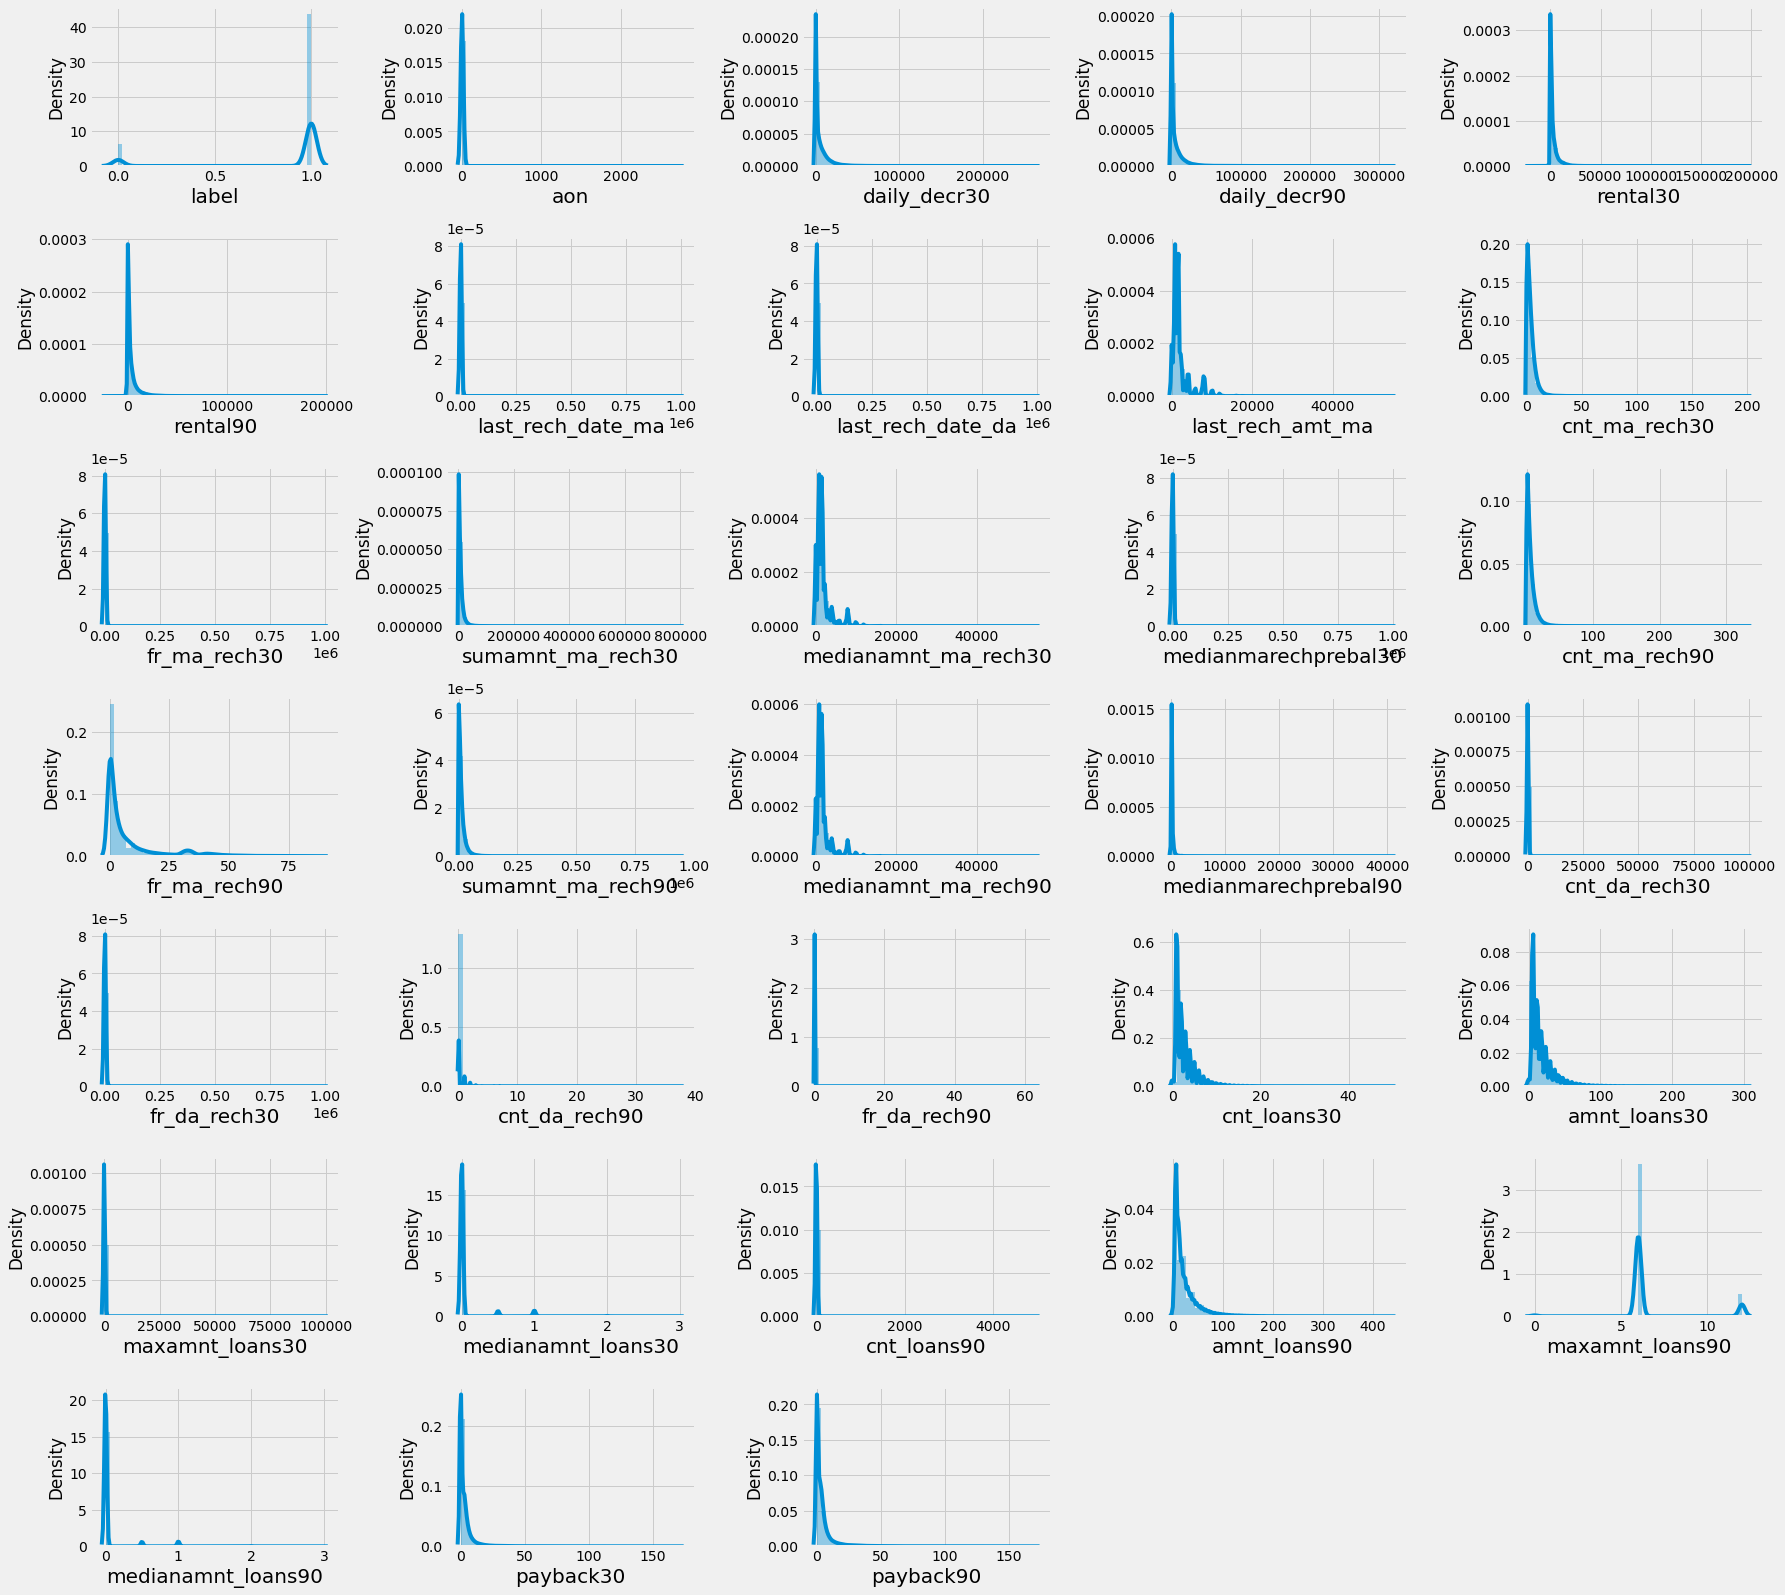

In [11]:
#lets check distribution for continuous columns
num_data = df._get_numeric_data()
plt.style.use('fivethirtyeight')
plt.figure(figsize = (25,25))
plotnumber = 1
for column in num_data:
    if plotnumber <=34:
        ax = plt.subplot(8,5,plotnumber)
        sns.distplot(num_data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

## Key findings and assumptions:
Looking at the data description and distribution plots I came to know that most of the entries are negative and very large values which are unrealistic. 

I decided to drop negative data and as we don’t want to lose much data so I am using percentile method to replace large number. And have replaced all unrealistic entries with suitable action.

In [12]:
#lets eleminate negative entries from our dataset
num = df._get_numeric_data()

for col in num.columns:
    if col != 'label':
        df = df.loc[df[col] >= 0]
        

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,197333.0,0.881799,0.322847,0.00000,1.000000,1.000000,1.000000,1.000000
aon,197333.0,22.364284,208.084857,0.00274,0.682192,1.446575,2.682192,2739.344535
daily_decr30,197333.0,5629.008544,9395.237972,0.00000,47.058000,1740.000000,7650.000000,265926.000000
daily_decr90,197333.0,6368.178216,11137.380436,0.00000,47.300000,1784.740000,8283.520000,320630.000000
rental30,197333.0,2825.292433,4362.599547,0.00000,331.960000,1187.120000,3552.610000,198926.110000
rental90,197333.0,3659.612118,5851.924127,0.00000,380.790000,1474.070000,4419.760000,200148.110000
last_rech_date_ma,197333.0,3832.937763,54473.489187,0.00000,1.000000,3.000000,7.000000,998650.377733
last_rech_date_da,197333.0,3767.099897,53766.096400,0.00000,0.000000,0.000000,0.000000,999171.809410
last_rech_amt_ma,197333.0,2015.997639,2270.835102,0.00000,770.000000,1539.000000,2309.000000,55000.000000
cnt_ma_rech30,197333.0,4.080681,4.302792,0.00000,1.000000,3.000000,6.000000,203.000000


Great we have removed all the negative data from our data set. by which we are losing about 5-6% of data. which is acceptable.

In [14]:
#lets check unique entries from pcircle column
df['pcircle'].unique()

array(['UPW'], dtype=object)

There is only single entry through out the pcircle column, so we can drop this column.Also the column 'pdate' is not needed for prediction

In [15]:
df.drop(columns = ['pcircle'], inplace = True)

##### Replacing Large values

In [16]:
for col in df.columns:
    if col != 'pdate':
      percentile=df[col].quantile([0.01,0.96]).values
      df[col][df[col] <= percentile[0]] = percentile[0]
      df[col][df[col] >= percentile[1]] = percentile[1]

In [17]:
#Seperating Day, Month, Year columns using pandas Datetime function
df['Month'] = pd.DatetimeIndex(df['pdate']).month
df['Day'] = pd.DatetimeIndex(df['pdate']).day
df['Year'] = pd.DatetimeIndex(df['pdate']).year

In [18]:
#let have a look at dataset
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,Month,Day,Year
0,0,0.745205,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2.0,12,6,0.0,15.333333,20.500000,2016-07-20,7,20,2016
1,1,1.950685,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,8,10,2016
2,1,1.465753,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,8,19,2016
3,1,0.660274,21.228000,21.228000,159.42,159.42,29.0,0.0,947,0,...,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,6,6,2016
4,1,2.594521,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,6,22,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,1.106849,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,2.0,12,6,0.0,1.000000,1.000000,2016-06-17,6,17,2016
209589,1,2.945205,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,3.0,18,6,0.0,1.000000,1.000000,2016-06-12,6,12,2016
209590,1,2.775342,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,6.0,54,12,0.0,4.000000,3.833333,2016-07-29,7,29,2016
209591,1,4.745205,12488.228333,12574.370000,411.83,984.58,2.0,0.0,773,5,...,3.0,24,12,0.0,0.000000,10.500000,2016-07-25,7,25,2016


As we have derived seperate columns for day, month and year using column __pdate__, I will drop this column

In [19]:
df.drop(columns = 'pdate', inplace = True)

In [20]:
#Checking value counts for Year column
df['Year'].value_counts()

2016    197333
Name: Year, dtype: int64

In [21]:
#As all the data is from same year I will drop the Year column
df.drop(columns = 'Year', inplace = True)

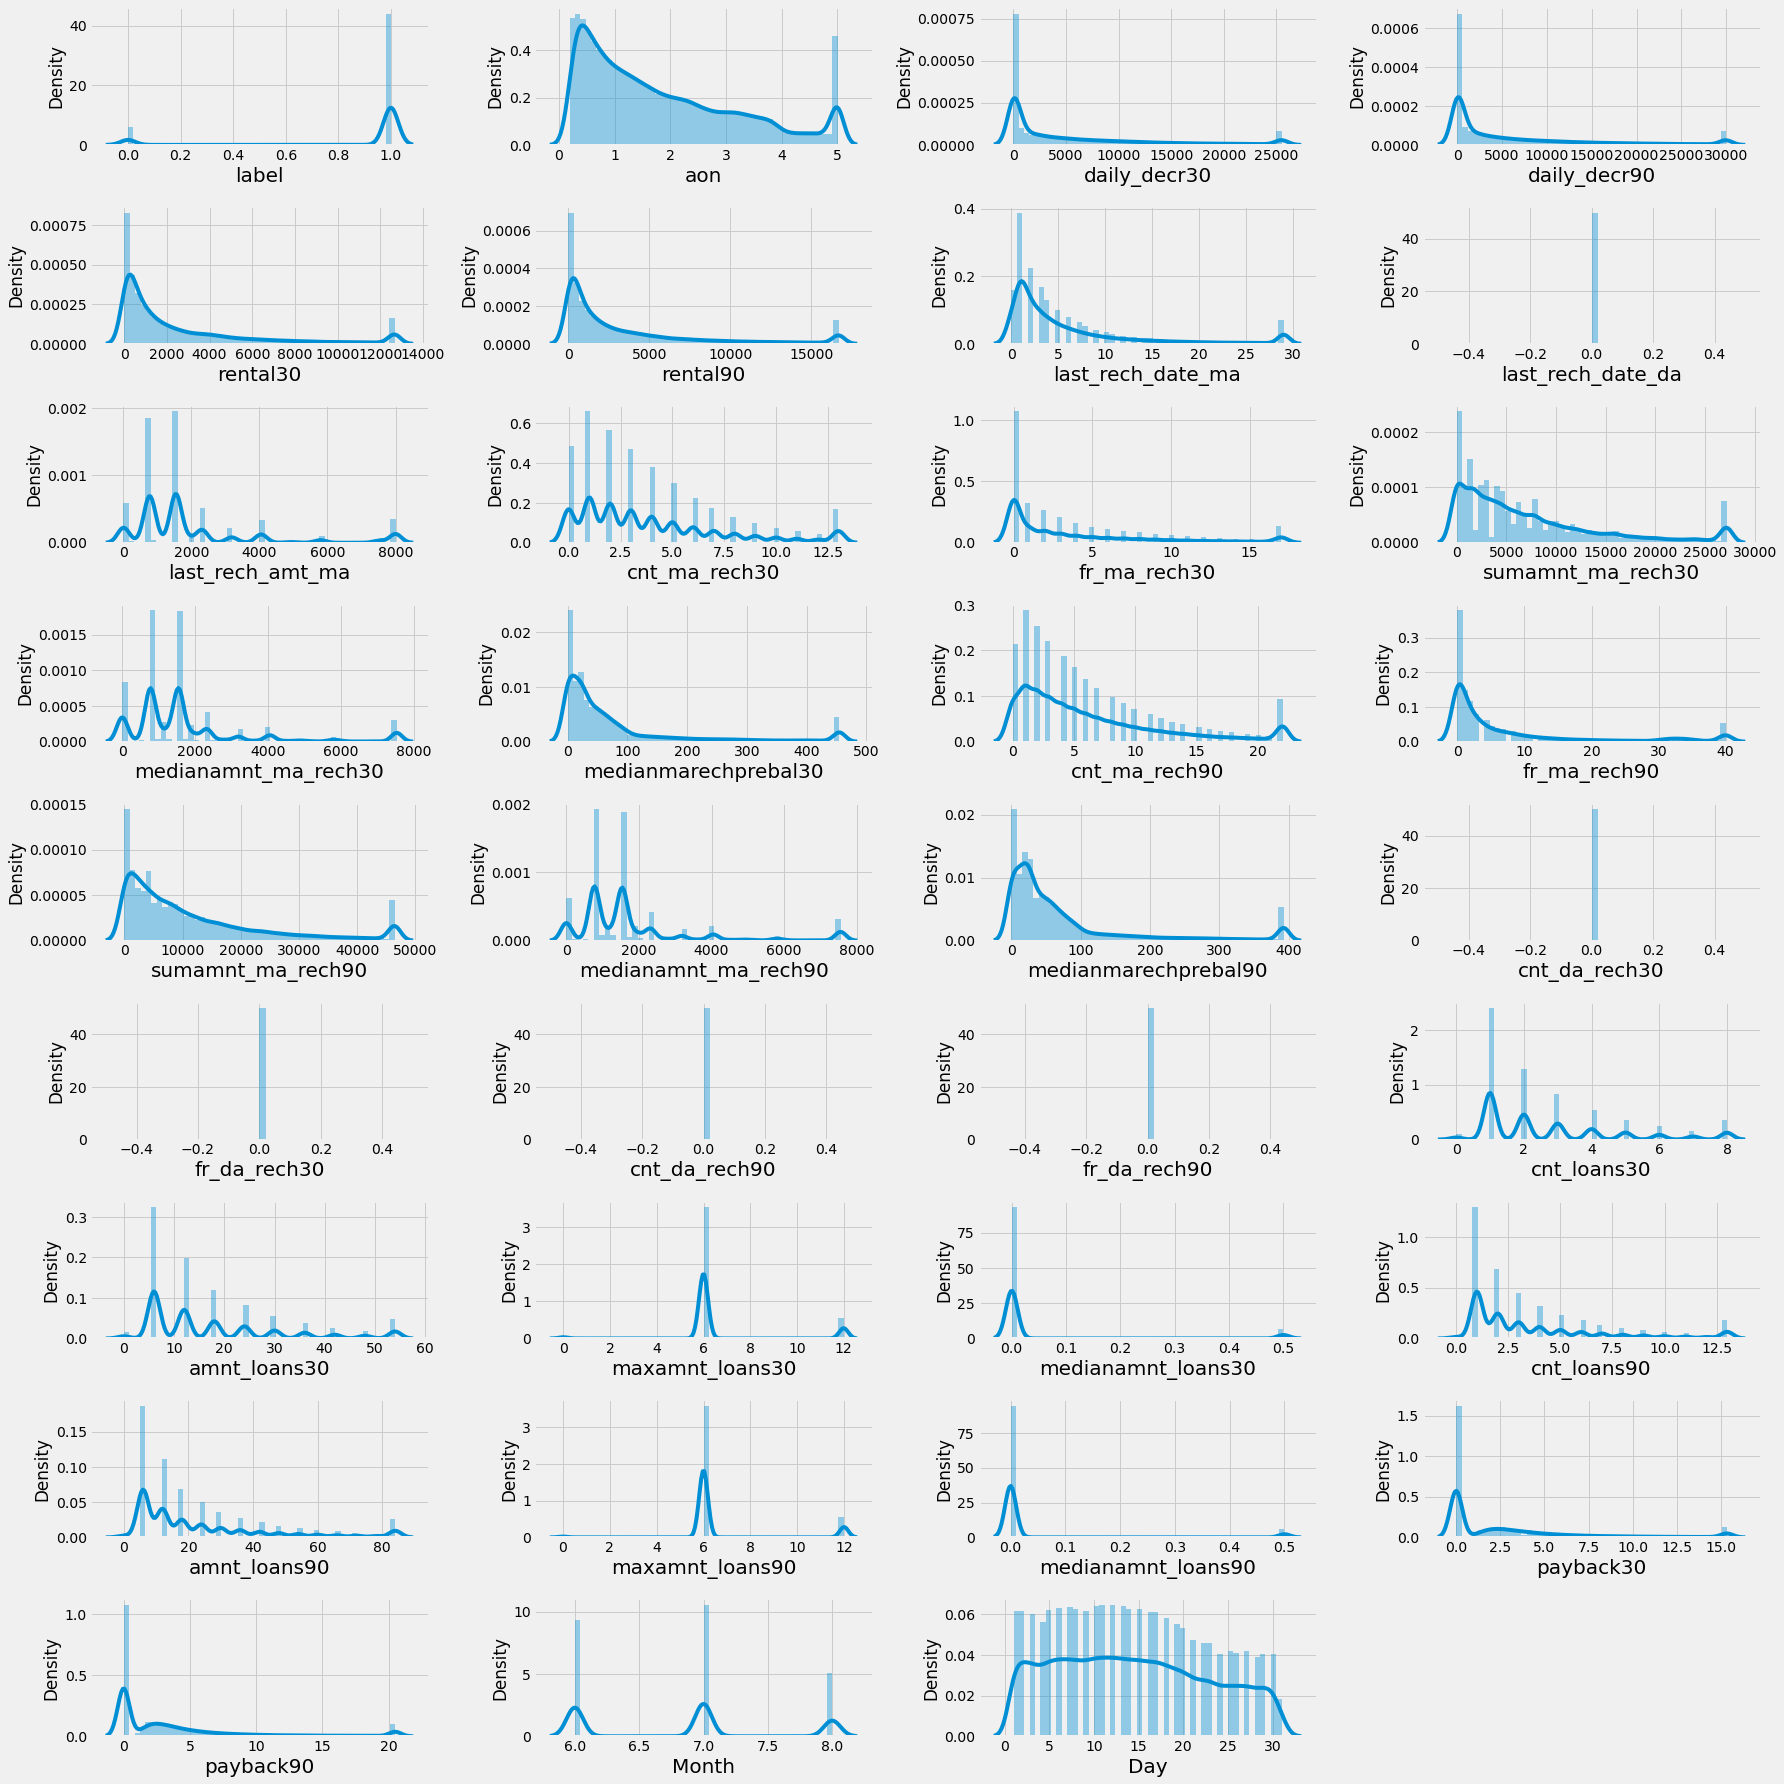

In [22]:
#lets check outliers from continuous columns
plt.figure(figsize = (25,25))
plotnumber = 1
for column in df:
    if plotnumber <=35:
        ax = plt.subplot(9,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

After replacing negative and large values we can see the distribution plots looks quite good, but now some of the columns having only 0's through out so I will delete those columns.

In [23]:
df.drop(columns = ['last_rech_date_da','fr_da_rech30','fr_da_rech90','cnt_da_rech30','cnt_da_rech90'], inplace = True)

## Visualization

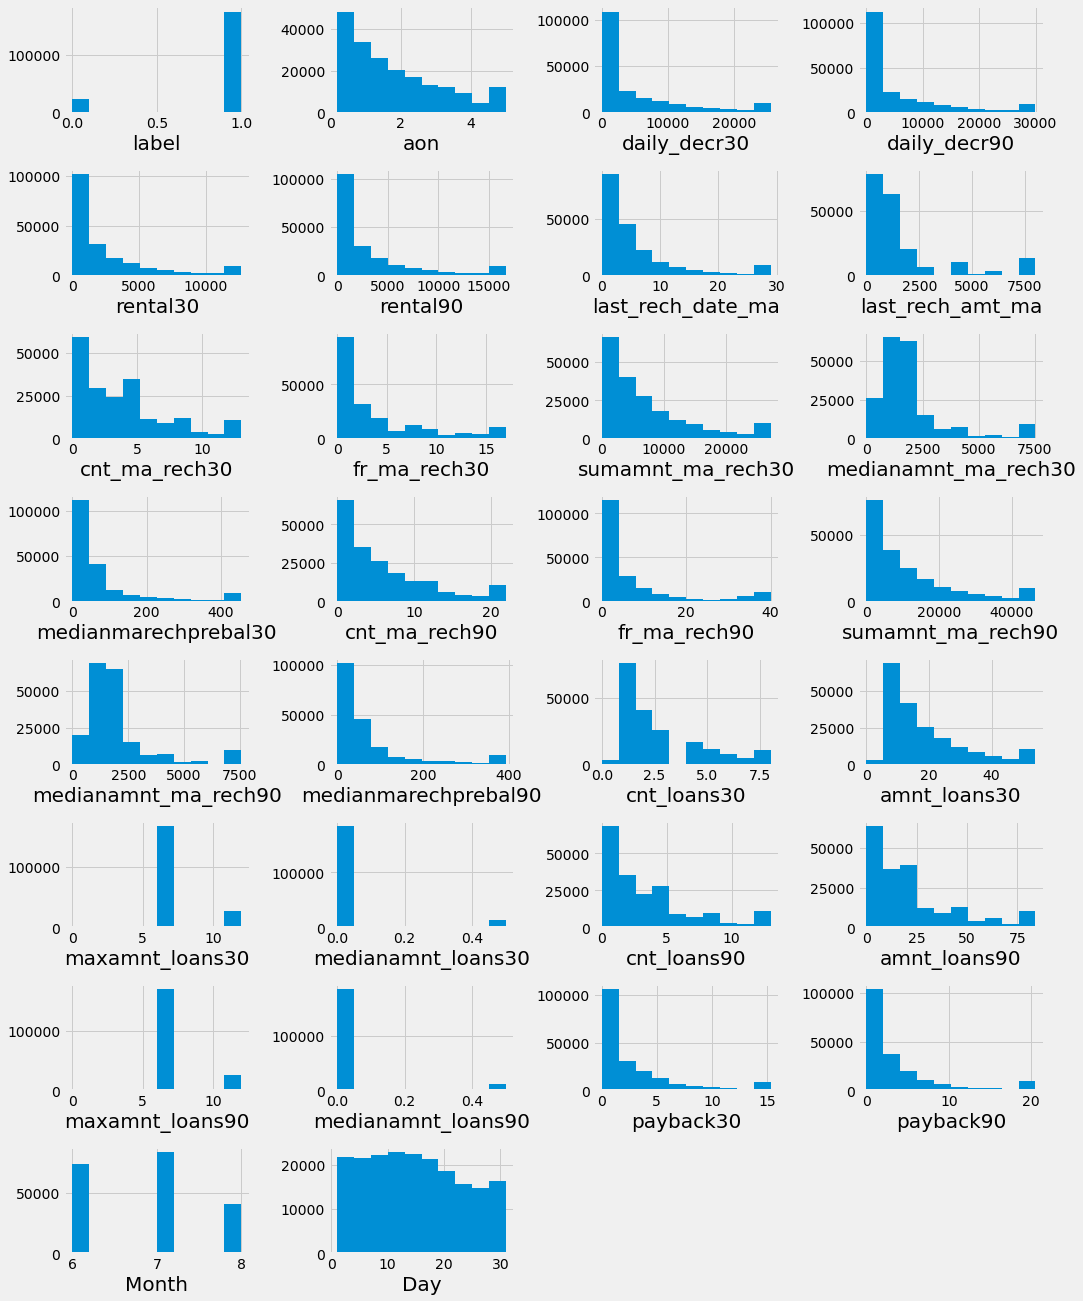

In [24]:
#lets check outliers from continuous columns
plt.figure(figsize = (15,20))
plotnumber = 1
for column in df:
    if plotnumber <=32:
        ax = plt.subplot(9,4,plotnumber)
        plt.hist(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

Looking at the above hist plots we can say now we got better range of our data than earlier.

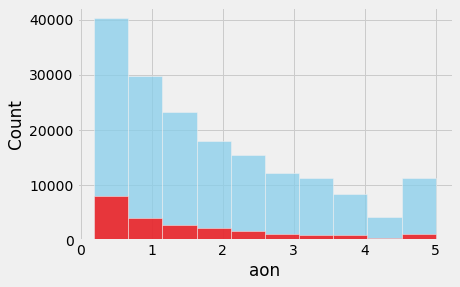

In [25]:
#Lets check barplot for column 'aon' with label
sns.histplot(data=df.loc[df["label"]==1], x="aon", color="skyblue", bins = 10)
sns.histplot(data=df.loc[df["label"]==0], x="aon", color="red", bins = 10)
plt.show()

Looking at above hist plot we can say that large number of customers are there who are using cellular network since arround 1 year, and the rate of paying back the credit amount in these people is higher than others.

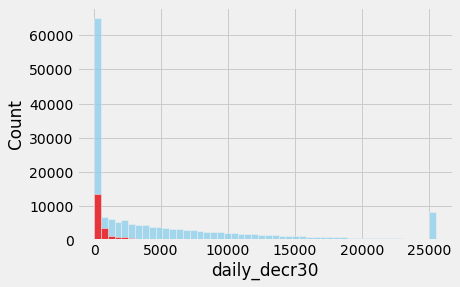

In [26]:
#lets plot boxplot 
sns.histplot(data=df.loc[df["label"]==1], x="daily_decr30", color="skyblue", bins = 50)
sns.histplot(data=df.loc[df["label"]==0], x="daily_decr30", color="red", bins = 50)
plt.show()

Above plot indicates that large count of customers who spents less daily amount .

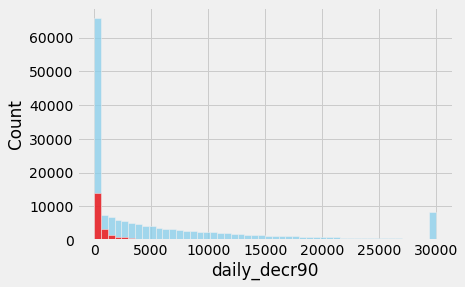

In [27]:
#lets check hist graph for daily amount spent from main account, averaged over last 90 days
sns.histplot(data=df.loc[df["label"]==1], x="daily_decr90", color="skyblue", bins = 50)
sns.histplot(data=df.loc[df["label"]==0], x="daily_decr90", color="red", bins = 50)
plt.show()

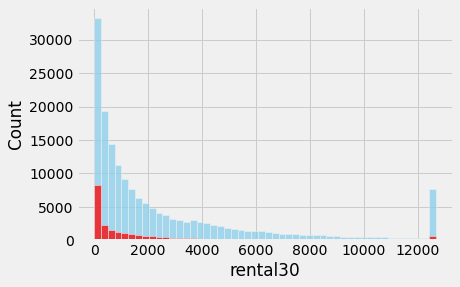

In [28]:
# Average main account balance over last 30 days
sns.histplot(data=df.loc[df["label"]==1], x="rental30", color="skyblue", bins = 50)
sns.histplot(data=df.loc[df["label"]==0], x="rental30", color="red", bins = 50)
plt.show()

Most of the customers having average main account balance over last 30 days in the range of 0 to 1000, and customers with balance amount 0 are having higher rate of not paying the credit amount within 5 days.

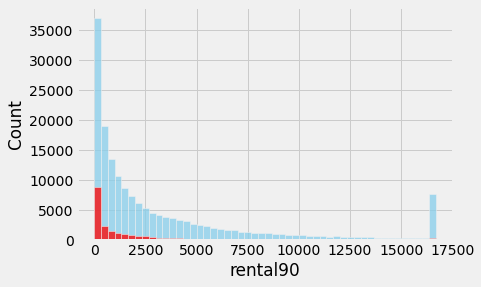

In [29]:
# Average main account balance over last 30 days
sns.histplot(data=df.loc[df["label"]==1], x="rental90", color="skyblue", bins = 50)
sns.histplot(data=df.loc[df["label"]==0], x="rental90", color="red", bins = 50)
plt.show()

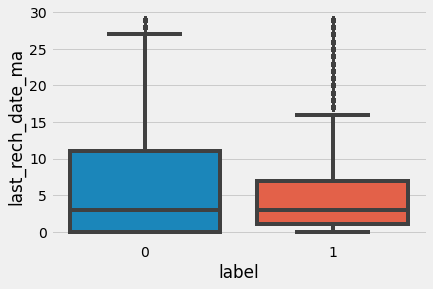

In [30]:
#lets check Number of days till last recharge of main account and label
sns.boxplot(x = df.label, y = df.last_rech_date_ma)
plt.show()

As we see in this box plot more number of people who recharge their main account 6 to 12 days back are most likely not paying the loan amount. 

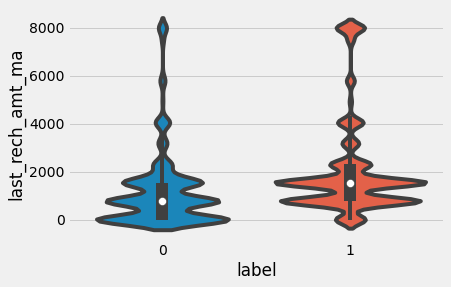

In [31]:
#lets have alook at violin plot of last_rech_amt_ma and label
sns.violinplot(x = df.label, y = df.last_rech_amt_ma)
plt.show()

Looking at this graph we can say that if the amount of last recharge of main account is around 2000 then more number of people will pay back the loan amount.

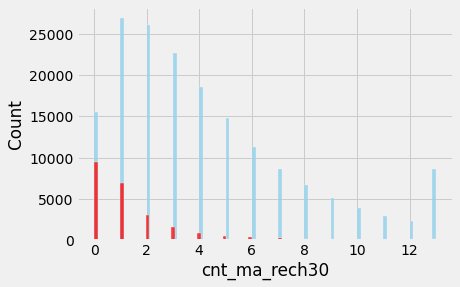

In [32]:
# Number of times main account got recharged in last 30 days
sns.histplot(data=df.loc[df["label"]==1], x="cnt_ma_rech30", color="skyblue")
sns.histplot(data=df.loc[df["label"]==0], x="cnt_ma_rech30", color="red")
plt.show()

The above histogram for number of times main account got recharged in last 30 days shows that when people didn't recharge their main account or recharges only once in 30 days the rate of not paying back the credit amount is higher compared to others.

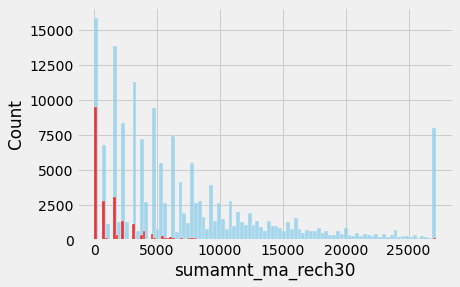

In [33]:
#Total amount of recharge in main account over last 30 days
sns.histplot(data=df.loc[df["label"]==1], x="sumamnt_ma_rech30", color="skyblue")
sns.histplot(data=df.loc[df["label"]==0], x="sumamnt_ma_rech30", color="red")
plt.show()

* We can say when Total amount of recharge in main account over last 30 days is above 5000, almost every customer will pay back the credit ammount within estimated time.
* And if the total amount of recharge in main account over last 30 days is near to 0, then tendency of customers not to paying back the credit amount increases.

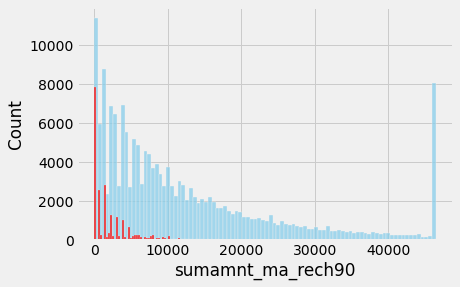

In [34]:
# lets have a look at Total amount of recharge in main account over last 90 days
sns.histplot(data=df.loc[df["label"]==1], x="sumamnt_ma_rech90", color="skyblue")
sns.histplot(data=df.loc[df["label"]==0], x="sumamnt_ma_rech90", color="red")
plt.show()

* Ratio of getting customers who are not paying credit ammount within 5 days is high when total amount of recharge in main account over last 90 days is 0.
* And the customers who are maintaining total amount of recharge in main account over last 90 days above 5000 are paying the credit amount within 5 days

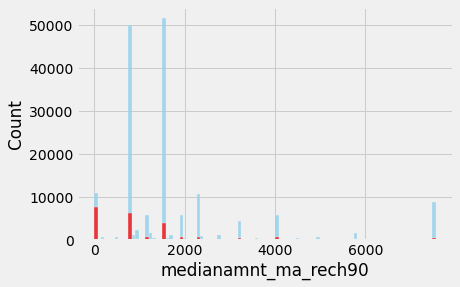

In [35]:
#lets have a look at Median of amount of recharges done in main account over last 90 days at user level
sns.histplot(data=df.loc[df["label"]==1], x="medianamnt_ma_rech90", color="skyblue", bins = 100)
sns.histplot(data=df.loc[df["label"]==0], x="medianamnt_ma_rech90", color="red", bins = 100)
plt.show()

we can see that when Median of amount of recharges done in main account over last 90 days at user level is 0, the ratio of customers to not to pay back the credit amount within 5 days is high.

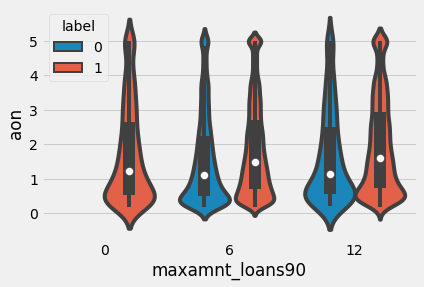

In [36]:
sns.violinplot(x = df.maxamnt_loans90, y = df.aon, hue = df.label)
plt.show()

This violin plot tells us that when the loan taken in last 90 days is very less or near to zero they will pay back the credit amount within 5 days

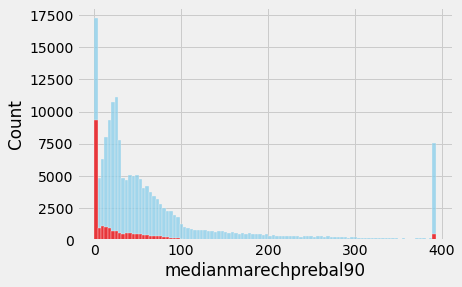

In [37]:
#Median of main account balance just before recharge in last 90 days at user level
sns.histplot(data=df.loc[df["label"]==1], x="medianmarechprebal90", color="skyblue", bins = 100)
sns.histplot(data=df.loc[df["label"]==0], x="medianmarechprebal90", color="red", bins = 100)
plt.show()

we can say that when median of main account balance just before recharge in last 90 days at user level is 0, the ratio of people not paying the credit amount within 5 days is high

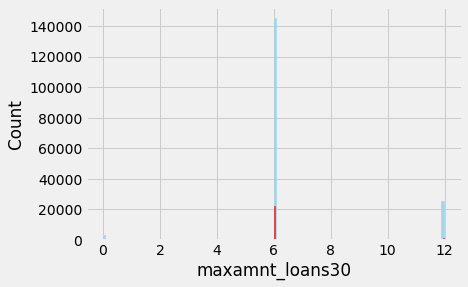

In [38]:
# maximum amount of loan taken by the user in last 30 days
sns.histplot(data=df.loc[df["label"]==1], x="maxamnt_loans30", color="skyblue", bins = 100)
sns.histplot(data=df.loc[df["label"]==0], x="maxamnt_loans30", color="red", bins = 100)
plt.show()

Looking at this plots we can say that whenever customer takes the loan amount of 6, then only some users may not pay back the loan amount.

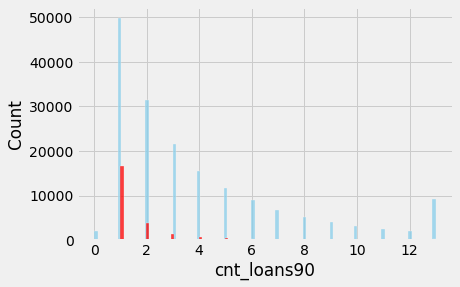

In [39]:
#Number of loans taken by user in last 90 days
sns.histplot(data=df.loc[df["label"]==1], x="cnt_loans90", color="skyblue", bins = 100)
sns.histplot(data=df.loc[df["label"]==0], x="cnt_loans90", color="red", bins = 100)
plt.show()

when a person takes loan ammount for 1 time in last 90 days the chances of not paying back the credit ammount are higher.

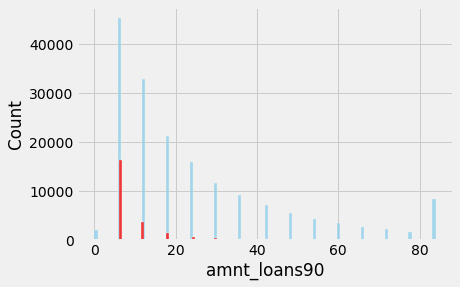

In [40]:
#Total amount of loans taken by user in last 90 days
sns.histplot(data=df.loc[df["label"]==1], x="amnt_loans90", color="skyblue", bins = 100)
sns.histplot(data=df.loc[df["label"]==0], x="amnt_loans90", color="red", bins = 100)
plt.show()

looking at this plot we can conclude that when total amount of loans taken by user in last 90 days is below 10; the chances of user not paying back the credit amount are more.

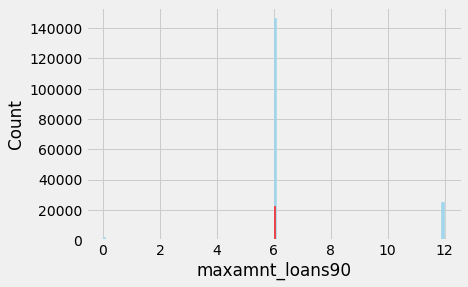

In [41]:
#maximum amount of loan taken by the user in last 90 days
sns.histplot(data=df.loc[df["label"]==1], x="maxamnt_loans90", color="skyblue", bins = 100)
sns.histplot(data=df.loc[df["label"]==0], x="maxamnt_loans90", color="red", bins = 100)
plt.show()

Looking at this plots we can say that whenever customer takes the loan amount of 6, then only some users may not pay back the loan amount.

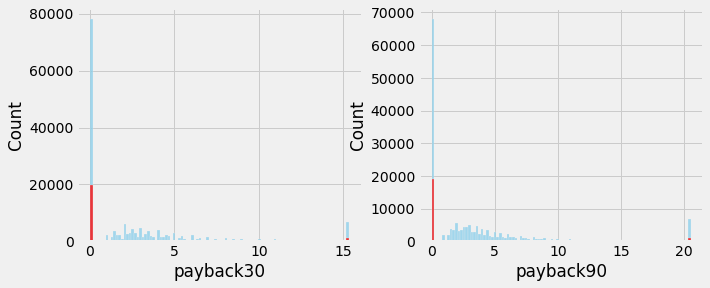

In [42]:
#lets have a look at Average payback time in days over last 30 & 90 days
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(data=df.loc[df["label"]==1], x= 'payback30', color="skyblue", bins = 100)
sns.histplot(data=df.loc[df["label"]==0], x= 'payback30', color="red", bins = 100)
plt.subplot(1,2,2)
sns.histplot(data=df.loc[df["label"]==1], x= 'payback90', color="skyblue", bins = 100)
sns.histplot(data=df.loc[df["label"]==0], x= 'payback90', color="red", bins = 100)
plt.show()

It is seen that when Average payback time in days over last 30 & 90 days is zero then only some customers will not pay back the loan amount

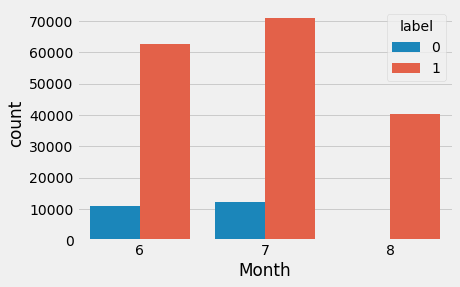

In [43]:
#lets check the label based on month
sns.countplot(x = 'Month', hue = 'label', data = df)
plt.show()

This will tell us that customers who have taken loans in the month of august they are paying back the credit amount within 5 day.

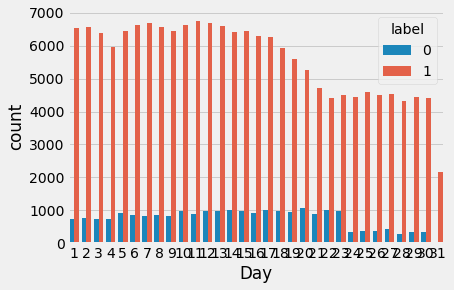

In [44]:
#lets check the day counts
sns.countplot(x = 'Day',hue = 'label',data = df)
plt.show()

## Heat map for Correlation

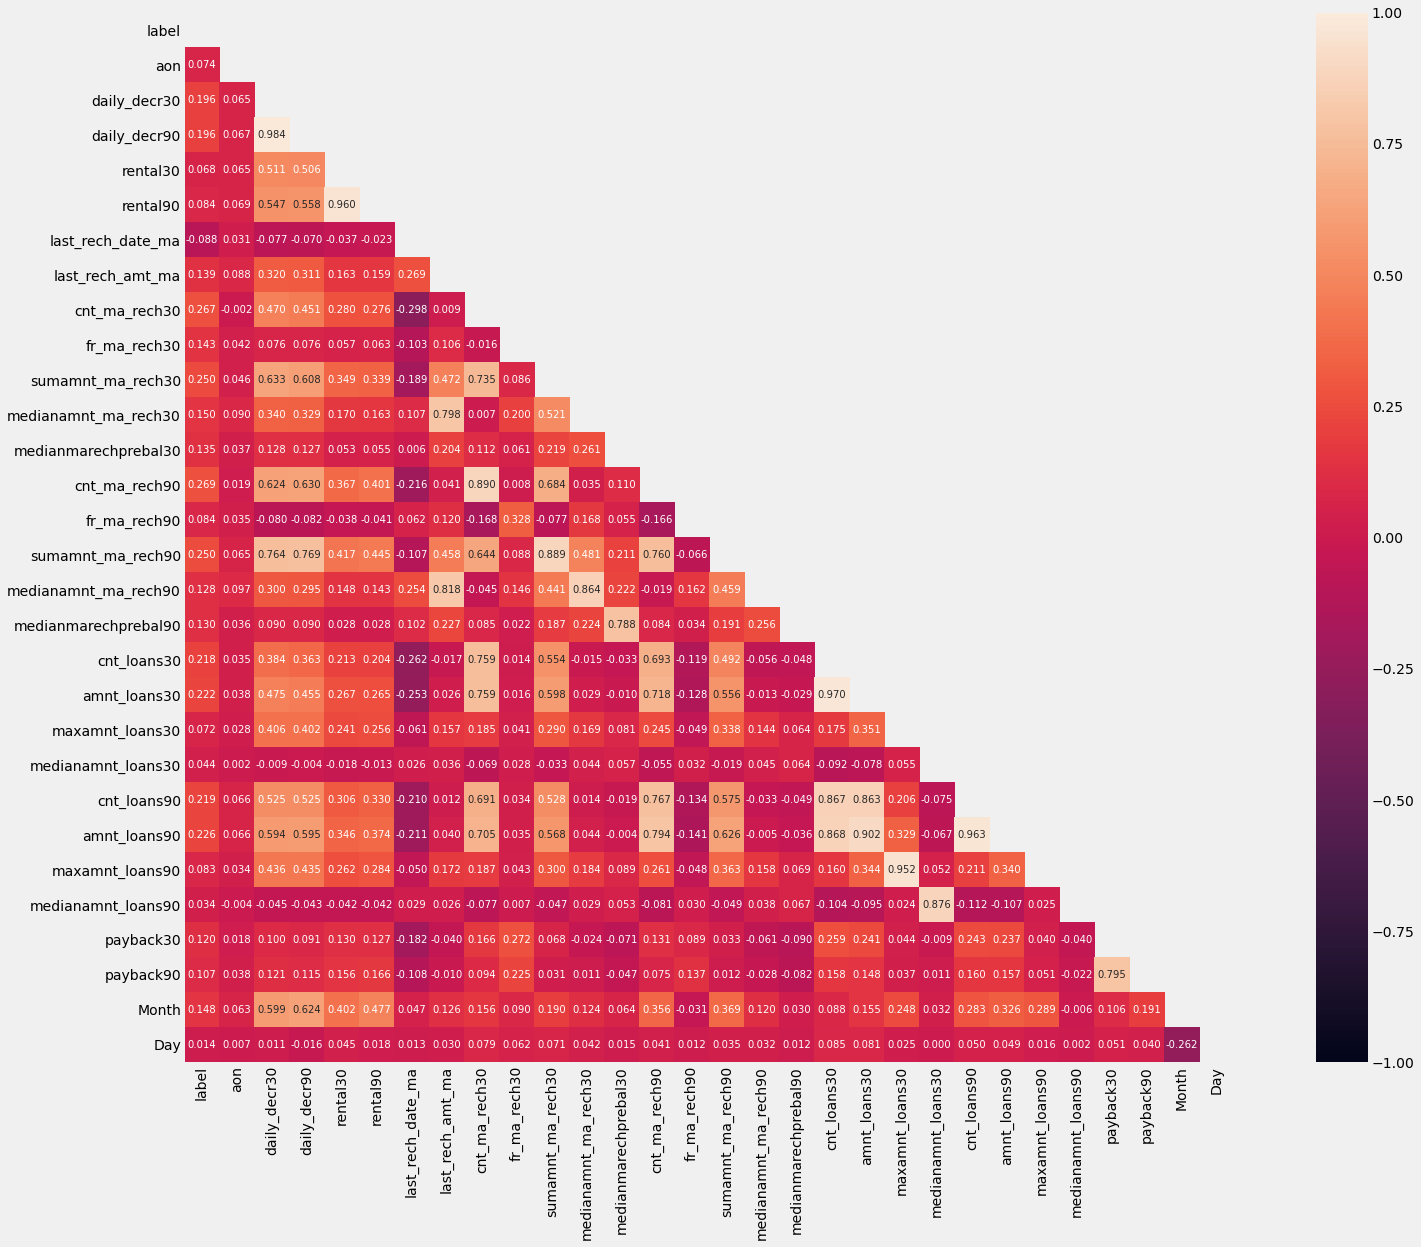

In [45]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(26,18))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',
            annot_kws={'size':10}, mask=upper_triangle)
plt.show()

* Looking at the above heat map we can say that there is no any strongly related feature with the label.
* features like daily_decr30 & daily_decr90, rental30 & rental90 are strongly related to each other.
* mazamnt_loans90 and maxamnt_loans30 have maximum correlation between them.

## correlation between Features & label

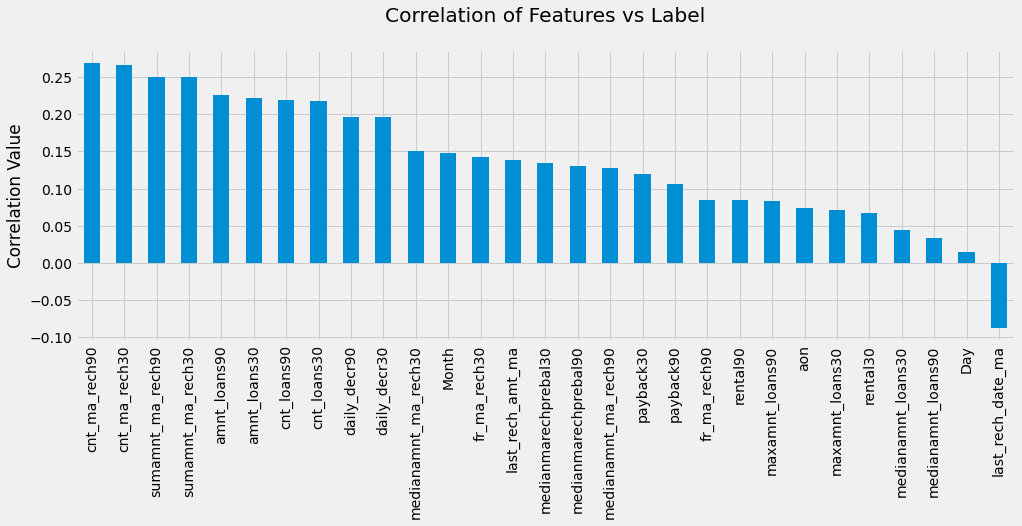

In [46]:
df_corr = df.corr()
plt.figure(figsize=(15,5))
df_corr['label'].sort_values( ascending = False).drop('label').plot.bar()
plt.title("Correlation of Features vs Label\n")
plt.ylabel("Correlation Value")
plt.show()

Looking at above plot we can conclude that all features are having very less correlation with label, which is below 0.30.
*	cnt_ma_rech90 has maximum correlation with label.
*	Column Day is having least relation with the label.
*	And last_rech_date_ma is in negative relation with label.


In [47]:
#lets check the skewness
df.skew()

label                  -2.365223
aon                     0.830852
daily_decr30            1.578630
daily_decr90            1.671968
rental30                1.744314
rental90                1.786469
last_rech_date_ma       1.996298
last_rech_amt_ma        1.953839
cnt_ma_rech30           1.097175
fr_ma_rech30            1.384312
sumamnt_ma_rech30       1.326655
medianamnt_ma_rech30    2.077778
medianmarechprebal30    2.166324
cnt_ma_rech90           1.239206
fr_ma_rech90            1.868194
sumamnt_ma_rech90       1.444872
medianamnt_ma_rech90    2.123488
medianmarechprebal90    2.149255
cnt_loans30             1.218336
amnt_loans30            1.273042
maxamnt_loans30         1.348610
medianamnt_loans30      3.444119
cnt_loans90             1.460614
amnt_loans90            1.495790
maxamnt_loans90         1.616369
medianamnt_loans90      3.795964
payback30               1.833825
payback90               1.989670
Month                   0.281771
Day                     0.196770
dtype: flo

## Separate features and label

In [48]:
x = df.drop(columns = 'label')
y = df['label']

In [49]:
#treat the skewness
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.cbrt(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

In [50]:
#lets check the skewness
x.skew()

aon                     0.092689
daily_decr30            0.313713
daily_decr90            0.369414
rental30                0.298803
rental90                0.341898
last_rech_date_ma       0.003437
last_rech_amt_ma        1.205393
cnt_ma_rech30           0.451676
fr_ma_rech30            0.010741
sumamnt_ma_rech30       0.678015
medianamnt_ma_rech30    1.110997
medianmarechprebal30    0.165071
cnt_ma_rech90           0.634472
fr_ma_rech90            0.268769
sumamnt_ma_rech90      -0.332454
medianamnt_ma_rech90    1.228304
medianmarechprebal90    0.062318
cnt_loans30            -0.176515
amnt_loans30           -0.117622
maxamnt_loans30        -0.010034
medianamnt_loans30      3.444119
cnt_loans90             0.352170
amnt_loans90            0.356068
maxamnt_loans90         0.517651
medianamnt_loans90      3.795964
payback30               0.320601
payback90               0.217077
Month                   0.281771
Day                     0.196770
dtype: float64

## Feature Scaling

In [51]:
#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
X = pd.DataFrame(X,columns=x.columns)

In [52]:
#lets have a look on features after Scaling
X

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day
0,-0.747575,0.233129,0.187579,-0.897113,-0.894981,-0.308308,-0.082766,-0.425221,1.673118,-0.476835,...,-0.260555,-0.269296,-0.342741,-0.383045,-0.298858,-0.247325,1.890917,1.921725,0.228762,0.661517
1,0.351228,1.183806,1.093405,0.730789,0.526567,1.662245,1.893934,-0.821587,-1.187542,-0.019062,...,2.164322,-0.269296,-0.936811,-0.383045,2.296327,-0.247325,-0.952669,-1.042981,1.578065,-0.525902
2,-0.012660,-0.140855,-0.171075,-0.271760,-0.382250,-0.061290,-0.082766,-0.821587,-1.187542,-0.800529,...,-0.260555,-0.269296,-0.936811,-0.963841,-0.298858,-0.247325,-0.952669,-1.042981,1.578065,0.542775
3,-0.862439,-1.086055,-1.073200,-1.003558,-1.045629,2.147128,-0.468249,-1.496365,-1.187542,-1.351590,...,-0.260555,-0.269296,-0.342741,-0.383045,-0.298858,-0.247325,-0.952669,-1.042981,-1.120541,-1.000870
4,0.750623,-0.799359,-0.799569,-0.156971,-0.278193,0.135362,0.350122,0.972856,0.214174,1.697337,...,-0.260555,-0.269296,1.149765,1.076113,-0.298858,-0.247325,0.565475,0.393796,-1.120541,0.899001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197328,-0.338005,-0.797706,-0.797991,-0.162241,-0.282970,-0.660450,1.179359,-0.092769,0.214174,0.618598,...,-0.260555,-0.269296,-0.342741,-0.383045,-0.298858,-0.247325,0.191932,0.040273,-1.120541,0.305291
197329,0.940709,-1.022977,-1.012996,0.133715,-0.014685,0.135362,-0.595901,0.203971,-0.075000,-0.474184,...,-0.260555,-0.269296,0.073985,0.024370,-0.298858,-0.247325,0.191932,0.040273,-1.120541,-0.288418
197330,0.850639,1.163859,1.078386,1.176120,1.351442,-0.061290,-0.082766,0.476700,1.037543,0.481087,...,2.164322,-0.269296,0.930782,1.449618,2.296327,-0.247325,0.864272,0.652355,0.228762,1.730195
197331,1.732324,1.209540,1.123487,-0.654742,-0.336337,-0.308308,-0.595901,0.476700,0.578509,0.833757,...,2.164322,-0.269296,0.073985,0.348713,2.296327,-0.247325,-0.952669,1.329085,0.228762,1.255227


In [53]:
#check value count for target variable
y.value_counts()

1    174008
0     23325
Name: label, dtype: int64

In [56]:
#lets do oversampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over,y_over = SM.fit_resample(X,y)

In [57]:
#lets check the target variable now
y_over.value_counts()

0    174008
1    174008
Name: label, dtype: int64

## Finding best random state

In [58]:
#Lets find the best random state using LogisticRegression
from sklearn.linear_model import LogisticRegression
max_accu = 0
max_rs = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.7801825203438922 on Random State 55


In [59]:
#lets split our data into train and test parts with best random_state
x_train,x_test,y_train,y_test = train_test_split(x_over, y_over, test_size = 0.25, random_state = 21)

## Defining the function for Model building and Evaluation

In [60]:
def BuiltModel(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,pred)*100

    print(f"Accuracy Score:", accuracy)
    print(f"roc_auc_score: {roc_auc_score(y_test,pred)*100}")
    print("---------------------------------------------------")

    #confusion matrix & classification report
    print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
    print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")

    #cross validation score
    scores = cross_val_score(model, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
    print("\nCross validation score :", scores)

    #result of accuracy minus cv score
    result = accuracy - scores
    print("\nAccuracy Score - Cross Validation Score :", result)

## LogisticRegression Model

In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
BuiltModel(lr)

Accuracy Score: 77.69068088823502
roc_auc_score: 77.6801971589687
---------------------------------------------------
Confusion Matrix : 
 [[34928  8778]
 [10632 32666]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.77      0.80      0.78     43706
           1       0.79      0.75      0.77     43298

    accuracy                           0.78     87004
   macro avg       0.78      0.78      0.78     87004
weighted avg       0.78      0.78      0.78     87004


Cross validation score : 77.63091440145095

Accuracy Score - Cross Validation Score : 0.059766486784070594


## DecisionTreeClassifier Model

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
BuiltModel(dt)

Accuracy Score: 91.74750586179947
roc_auc_score: 91.74442454174859
---------------------------------------------------
Confusion Matrix : 
 [[40385  3321]
 [ 3859 39439]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.91      0.92      0.92     43706
           1       0.92      0.91      0.92     43298

    accuracy                           0.92     87004
   macro avg       0.92      0.92      0.92     87004
weighted avg       0.92      0.92      0.92     87004


Cross validation score : 91.36363582958866

Accuracy Score - Cross Validation Score : 0.3838700322108082


## RandomForestClassifier Model

In [63]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
BuiltModel(rf)

Accuracy Score: 95.64732655969841
roc_auc_score: 95.64568389969605
---------------------------------------------------
Confusion Matrix : 
 [[41956  1750]
 [ 2037 41261]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     43706
           1       0.96      0.95      0.96     43298

    accuracy                           0.96     87004
   macro avg       0.96      0.96      0.96     87004
weighted avg       0.96      0.96      0.96     87004


Cross validation score : 95.25770936569076

Accuracy Score - Cross Validation Score : 0.3896171940076556


## XGBClassifier Model

In [64]:
from xgboost import XGBClassifier
xgb = XGBClassifier(verbosity = 0)
BuiltModel(xgb)

Accuracy Score: 95.34734035216772
roc_auc_score: 95.35160395923108
---------------------------------------------------
Confusion Matrix : 
 [[41277  2429]
 [ 1619 41679]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     43706
           1       0.94      0.96      0.95     43298

    accuracy                           0.95     87004
   macro avg       0.95      0.95      0.95     87004
weighted avg       0.95      0.95      0.95     87004


Cross validation score : 93.96669841147558

Accuracy Score - Cross Validation Score : 1.3806419406921435


## SGDClassifier Model

In [65]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
BuiltModel(sgd)

Accuracy Score: 77.11139717714128
roc_auc_score: 77.1030459410511
---------------------------------------------------
Confusion Matrix : 
 [[34477  9229]
 [10685 32613]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.76      0.79      0.78     43706
           1       0.78      0.75      0.77     43298

    accuracy                           0.77     87004
   macro avg       0.77      0.77      0.77     87004
weighted avg       0.77      0.77      0.77     87004


Cross validation score : 77.16742944129984

Accuracy Score - Cross Validation Score : -0.05603226415856


## ExtraTreesClassifier Model

In [66]:
from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier()
BuiltModel(ext)

Accuracy Score: 96.52659647832283
roc_auc_score: 96.51999815589068
---------------------------------------------------
Confusion Matrix : 
 [[42800   906]
 [ 2116 41182]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     43706
           1       0.98      0.95      0.96     43298

    accuracy                           0.97     87004
   macro avg       0.97      0.97      0.97     87004
weighted avg       0.97      0.97      0.97     87004


Cross validation score : 96.61136573178408

Accuracy Score - Cross Validation Score : -0.08476925346124631


## LGBMClassifier Model

In [68]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
BuiltModel(lgbm)

Accuracy Score: 94.96689807365179
roc_auc_score: 94.96980041646846
---------------------------------------------------
Confusion Matrix : 
 [[41237  2469]
 [ 1910 41388]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     43706
           1       0.94      0.96      0.95     43298

    accuracy                           0.95     87004
   macro avg       0.95      0.95      0.95     87004
weighted avg       0.95      0.95      0.95     87004


Cross validation score : 93.67906362631551

Accuracy Score - Cross Validation Score : 1.2878344473362802


## AUC ROC Curve

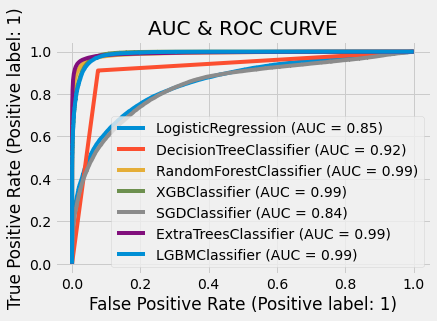

<Figure size 1440x1440 with 0 Axes>

In [69]:
#Lets plot roc curve and check auc and performance of all algorithms
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(dt, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plot_roc_curve(xgb, x_test, y_test, ax = disp.ax_)
plot_roc_curve(sgd, x_test, y_test, ax = disp.ax_)
plot_roc_curve(ext, x_test, y_test, ax = disp.ax_)
plot_roc_curve(lgbm, x_test, y_test, ax = disp.ax_)

plt.title('AUC & ROC CURVE')
plt.figure(figsize = (20,20))
plt.show()

Looking at observations we came to know that ExtraTreeClassifier is giving highest accuracy score as well as least difference in accuracy and cv-score. 


By observing AUC & ROC curve we can say that the model performance that means AUC of xgbclassifier, random forest, extra tree and LGBMClassifier is almost same. And among these four algorithms LGBMClassifier is giving better performance after hyperparameter tuning. So I have selected LGBMClassifier for our final model.


## Hyperparameter Tuning

In [70]:
#lets selects different parameters for tuning
params ={
       'boosting_type': ['gbdt','dart'],
       'n_estimators':[100,200,500,700],
       'max_depth': [-1,1,2,3],
       'importance_type': ['split','gain']
       
        }

In [71]:
#train the model with given parameters using RandomizedSearchCV
RCV =  RandomizedSearchCV(LGBMClassifier(), params, cv = 3)
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(),
                   param_distributions={'boosting_type': ['gbdt', 'dart'],
                                        'importance_type': ['split', 'gain'],
                                        'max_depth': [-1, 1, 2, 3],
                                        'n_estimators': [100, 200, 500, 700]})

In [72]:
RCV.best_params_       #printing the best parameters found by RandomizedSearchCV

{'n_estimators': 200,
 'max_depth': -1,
 'importance_type': 'split',
 'boosting_type': 'gbdt'}

## Final Model

In [73]:
#lets check the results of final model with best parameters
model = LGBMClassifier(importance_type = 'gain', max_depth = -1,boosting_type = 'dart',n_estimators = 700)
model.fit(x_train,y_train)
pred = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")
print("--------------------------------------------------------")

print(f"roc_auc_score: {roc_auc_score(y_test,pred)*100}%")
print("--------------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
print("----------------------------------------------------------------------")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")

Accuracy Score: 95.39791273964416%
--------------------------------------------------------
roc_auc_score: 95.4024254002939%
--------------------------------------------------------
Confusion Matrix : 
 [[41276  2430]
 [ 1574 41724]]

----------------------------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     43706
           1       0.94      0.96      0.95     43298

    accuracy                           0.95     87004
   macro avg       0.95      0.95      0.95     87004
weighted avg       0.95      0.95      0.95     87004



Nice ! We have improved our final model's accuracy from __94.95%__ to __95.34%__ by hyperparameter tuning.

## AUC ROC Curve for final model

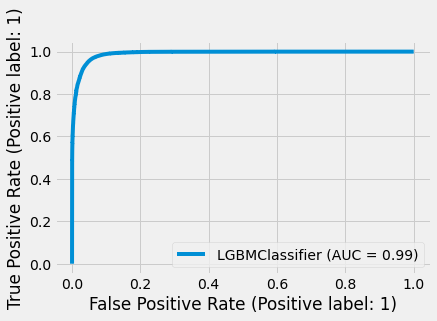

In [74]:
plot_roc_curve(model, x_test, y_test)
plt.show()

Also we can conclude by looking at AUC ROC curve for final model that our model performance also improved.

## Model saving

In [75]:
import joblib
joblib.dump(model,"Micro credit loan.pkl")

['Micro credit loan.pkl']

Finally I am saving the final model in .pkl file